# Chapter 2 – Individual Exercise 2 – Applying and Evaluating Supervised Learning Models

Name: Mirang Bhandari <br>
Matriculation Number: 100007049

This notebook applies and compares tree-based classifiers and K-Nearest Neighbors (KNN) on the Iris dataset.<br>
Source: https://www.kaggle.com/datasets/uciml/iris

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Load and Prepare the Dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Helper Function: Evaluation Metrics

In [3]:
def evaluate_classifier(model, X_test, y_test):
    preds = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds, average='weighted'),
        'Recall': recall_score(y_test, preds, average='weighted'),
        'F1-score': f1_score(y_test, preds, average='weighted')
    }

## 1. Tree-Based Classification Models

### 1.1 Decision Tree Classifier

In [4]:
results = {}

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
results['Decision Tree'] = evaluate_classifier(dt, X_test, y_test)

### 1.2 Random Forest Classifier

In [5]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
results['Random Forest'] = evaluate_classifier(rf, X_test, y_test)

### 1.3 Gradient Boosted Trees Classifier

In [6]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
results['Gradient Boosting'] = evaluate_classifier(gb, X_test, y_test)

## 2. K-Nearest Neighbors (KNN) Model

### 2.1 Testing Multiple k-values and Finding Optimal k

In [7]:
k_values = range(1, 21)
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    knn_accuracies.append(accuracy_score(y_test, preds))

optimal_k = list(k_values)[np.argmax(knn_accuracies)]
print("Optimal k:", optimal_k)

Optimal k: 3


In [8]:
print("KNN Accuracies by k value:")
for k, accuracy in zip(k_values, knn_accuracies):
    print(f"k={k}: {accuracy:.4f}")

KNN Accuracies by k value:
k=1: 0.9667
k=2: 0.9333
k=3: 1.0000
k=4: 1.0000
k=5: 1.0000
k=6: 0.9667
k=7: 0.9667
k=8: 0.9667
k=9: 1.0000
k=10: 1.0000
k=11: 0.9667
k=12: 0.9667
k=13: 0.9667
k=14: 0.9667
k=15: 0.9667
k=16: 0.9667
k=17: 0.9667
k=18: 0.9667
k=19: 0.9667
k=20: 0.9333


### 2.2 Plotting KNN Performance and Optimal Model

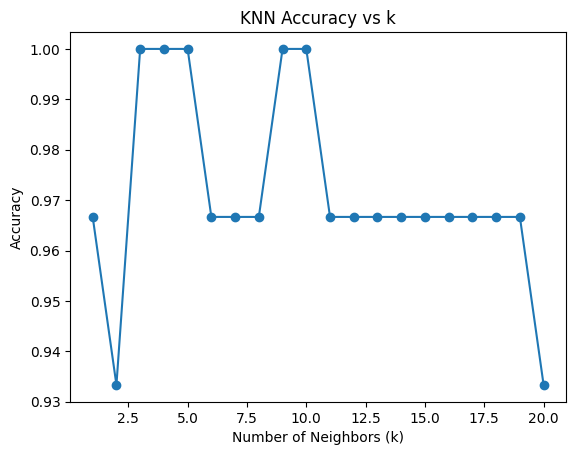

In [9]:
plt.plot(k_values, knn_accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.show()

knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train, y_train)
results['KNN (k=' + str(optimal_k) + ')'] = evaluate_classifier(knn_final, X_test, y_test)

## 3. Evaluation Metrics

### 3.1 Model Performance Comparison

In [10]:
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1-score
Decision Tree,0.933333,0.933333,0.933333,0.933333
Random Forest,0.900000,0.902357,0.900000,0.899749
Gradient Boosting,0.966667,0.969697,0.966667,0.966583
KNN (k=3),1.000000,1.000000,1.000000,1.000000
